   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
logistic regression target score :  0.7808350971714451
logistic regression test score :  0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]
0.996921300750433
0.8592307692307692


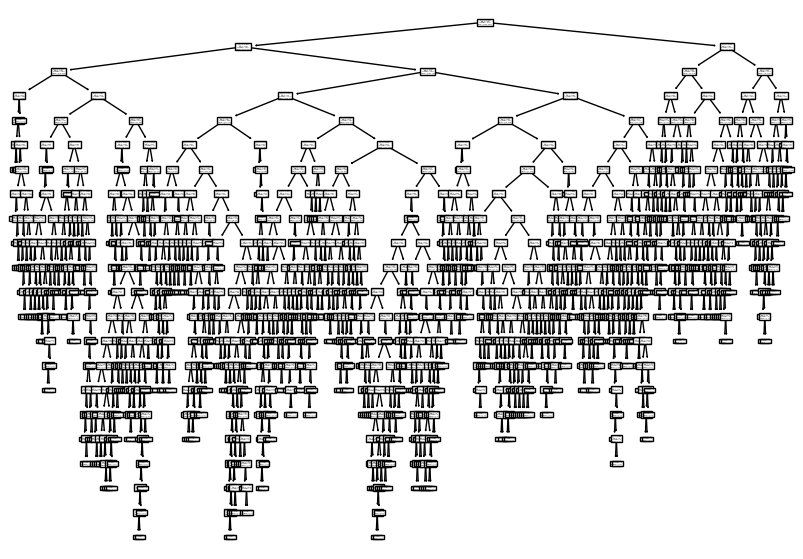

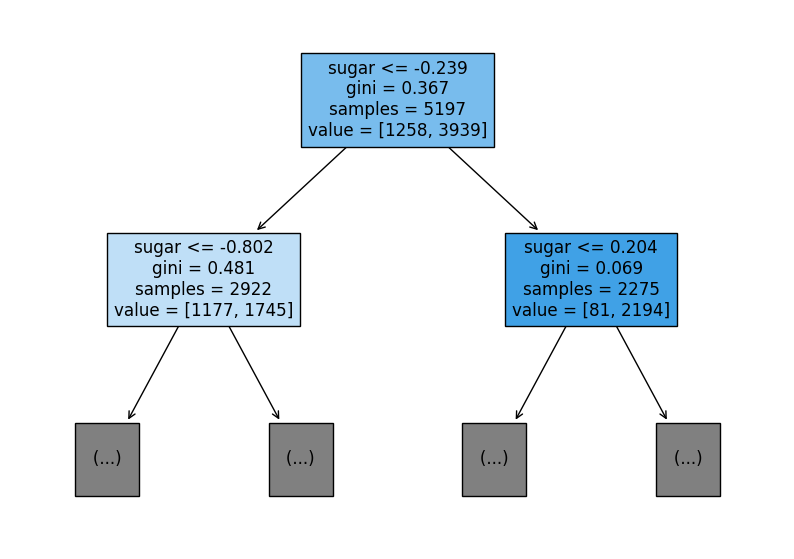

0.8454877814123533
0.8415384615384616


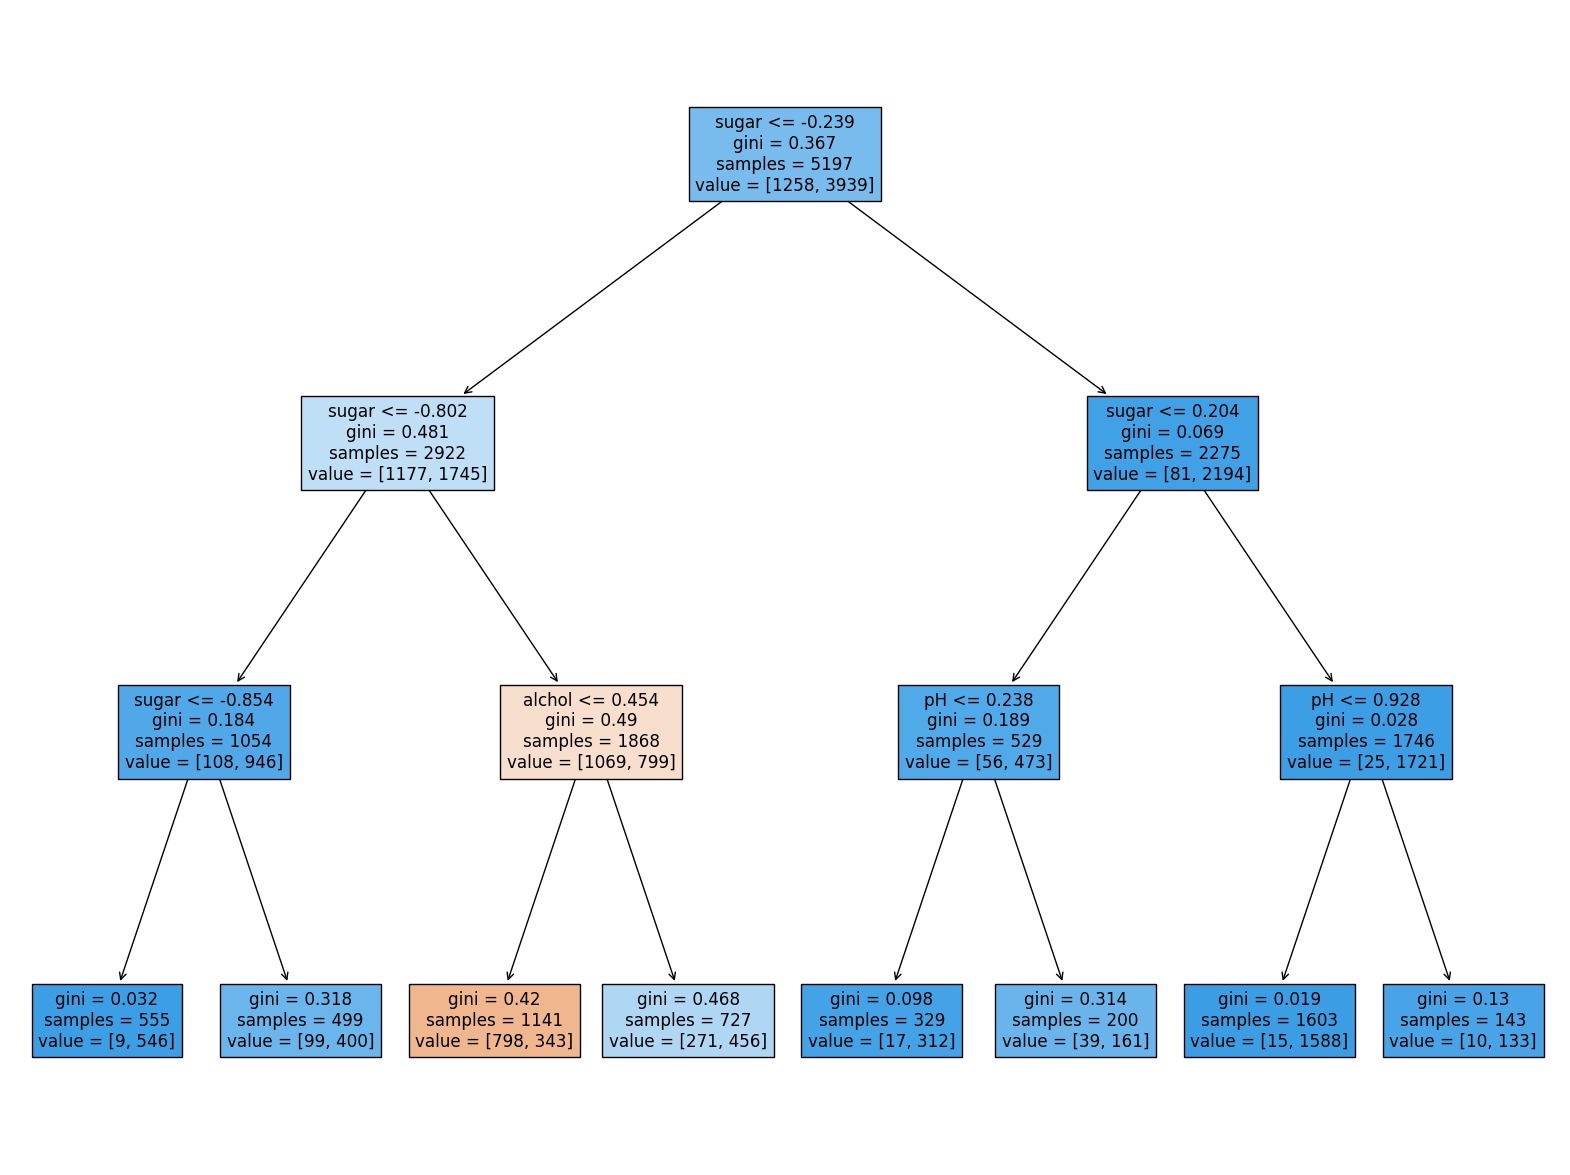

0.8454877814123533
0.8415384615384616


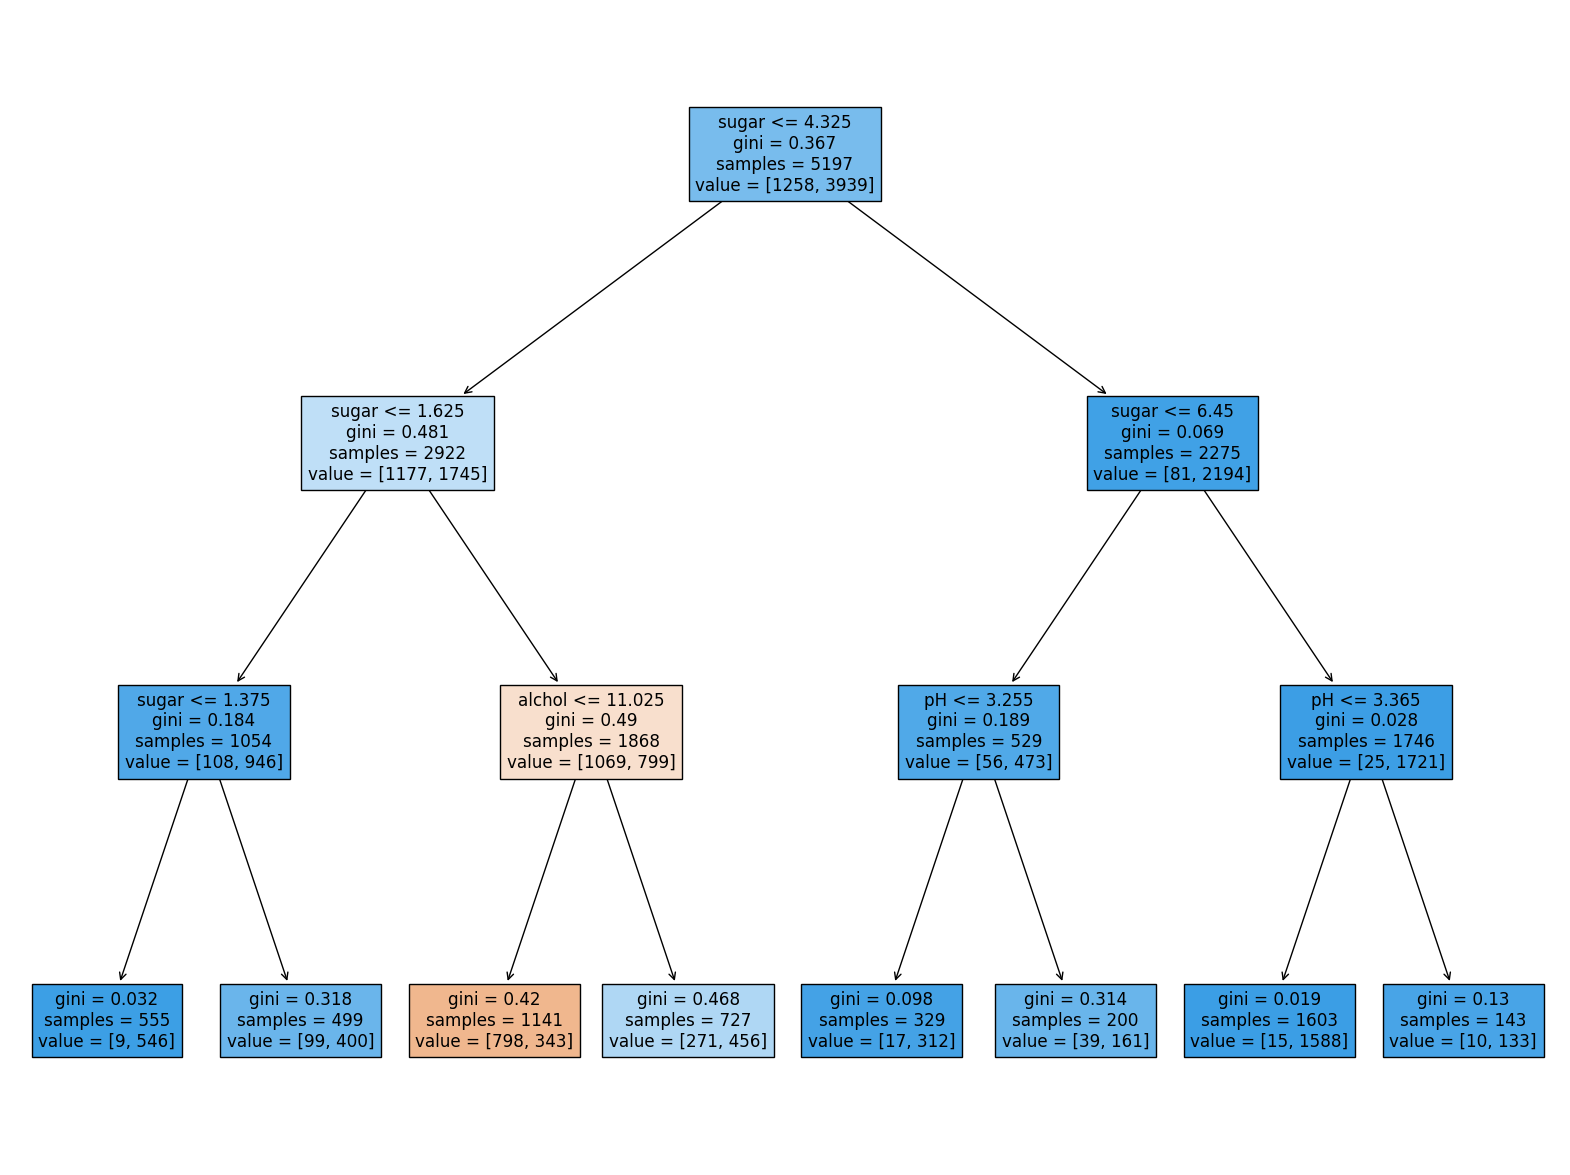

feature importance :  [0.12345626 0.86862934 0.0079144 ]


In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

print(wine.head())

wine.info()
wine.describe()

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

#data & target data split into train and test
from sklearn.model_selection import train_test_split
#Default of test_size parameter is 0.25
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

#data preprocessing
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#train using logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print('logistic regression target score : ', lr.score(train_scaled, train_target))
print('logistic regression test score : ', lr.score(test_scaled, test_target))

#print coefficient and intercept
print(lr.coef_, lr.intercept_)

#Logistic model is hard to explain other, how machine decide coefficients for each feature... et cetra...


####From now, we are going to use decision tree algorithm --> It is can explain simpler
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

#sciki learn package provide plot_tree() method. This method show tree what machine make
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()


#make tree more 
#If true, move to left node. If false, move to right node.
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

#Gini impurity = 1 - ∑(square of each class proportion)
#entropy impurity (entropy)
    #it is derived from imformation theory
    #-∑(pi * logsub2(pi))
        #Both are show node impurity --> Every kind of node contained equally, it is most impurity!
        #Only one node is contained, it is most purity state
#impormation gain
    #When the decision tree separates nodes, it separates the nodes so that the imformation gain is maximized.
    #i.g. = impurity of parents - (contain sample proportion * impurity) <-- compute second term for each child node
    #when we compute impurity, we have to considering impurity kindness(Gini impurity? or entropy?)
    #Refer book p.231

#There nothing any regulation for tree branch so, branch stretch indescriminately
#We have to regulate. Most easy method is decide max_depth

#depth = 3
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#show
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names = ['alchol', 'sugar', 'pH'])
plt.show()

#using train, test data set before preprocessing for Dicision Tree
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
#output is same with using dataset after preprocessing.
#As we  know this output, we don't have to preprocessing when we use DecisionTree algorithm. 
#It is one of the advantage of DecisionTree algorithm
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names = ['alchol', 'sugar', 'pH'])
plt.show()

#feature_importances_ show importance for each feature
    #Q)How model decide importance for each feature --> What is criterion.
print('feature importance : ',dt.feature_importances_)
